<a href="https://colab.research.google.com/github/wiicaakkk/Clustering/blob/main/Tubes_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#import dan membaca data train
df1 = pd.read_csv('kendaraan_train.csv')
df1

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
df1.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# menghapus data yang bernilai null dengan menggunakan dropna
# cek nilai null yang terdapat pada dataset menggunakan isna
df1 = df1.dropna(how='any',axis=0)
df1.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# Heatmap untuk menampilkan nilai korelasi antar variabel
corr = df1.corr()
corr.style.background_gradient(cmap='copper_r', axis=None)

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


In [ ]:
# drop Kolom id dan tertarik (Kasus Unsupervised)
# drop kolom jenis kelamin, umur kendaraan, sim dan asuransi karena hanya berisi 2 value
df1.drop('id', axis = 1, inplace = True)
df1.drop(['Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak'], axis=1, inplace=True)
df1.drop(['SIM', 'Sudah_Asuransi','Tertarik'], axis=1, inplace=True)
df1

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


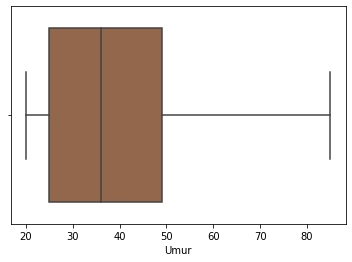

In [ ]:
# boxplot untuk kategori umur
sns. boxplot (x=df1['Umur'], palette='copper')
plt.show()

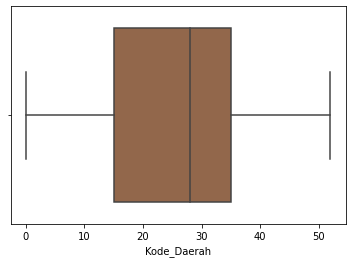

In [ ]:
# boxplot untuk kategori kode daerah
sns.boxplot (x=df1['Kode_Daerah'], palette='copper')
plt.show()

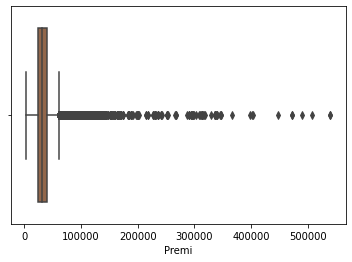

In [ ]:
# boxplot untuk kategori premi
sns.boxplot (x=df1[ 'Premi'], palette='copper')
plt.show()

In [ ]:
# drop kategori premi karena memiliki outliers yang banyak
df1.drop(['Premi'], axis=1, inplace=True)

In [ ]:
df1

,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,152.0,97.0
1,48.0,39.0,29.0,158.0
2,21.0,46.0,160.0,119.0
3,58.0,48.0,124.0,63.0
4,50.0,35.0,88.0,194.0
...,...,...,...,...
285826,23.0,4.0,152.0,217.0
285827,21.0,46.0,152.0,50.0
285828,23.0,50.0,152.0,226.0
285829,68.0,7.0,124.0,270.0


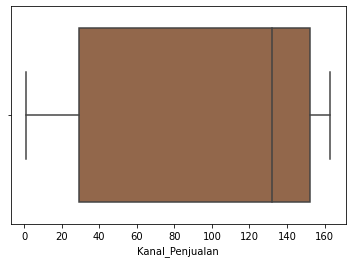

In [ ]:
# boxplot untuk kategori kanal penjualan
sns. boxplot (x=df1[ 'Kanal_Penjualan'], palette='copper')
plt.show()

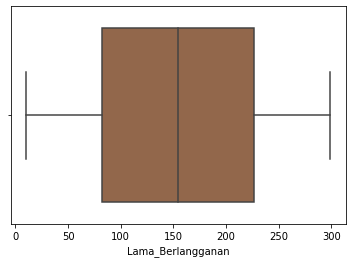

In [ ]:
# boxplot untuk kategori lama berlangganan
sns.boxplot (x=df1[ 'Lama_Berlangganan' ], palette='copper')
plt.show()

MinMaxScaling



In [ ]:
#Data Preparation Menggunkan MinMaxScaling
def min_max_scaling(df):
  df = df1.copy()
  for column in df1.columns:
    df1[column] = (df1[column] - df1[column].min()) / (df1[column].max () - df1[column].min())
  return df1
df1 = min_max_scaling(df1)

In [ ]:
df1

,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.932099,0.301038
1,0.430769,0.750000,0.172840,0.512111
2,0.015385,0.884615,0.981481,0.377163
3,0.584615,0.923077,0.759259,0.183391
4,0.461538,0.673077,0.537037,0.636678
...,...,...,...,...
285826,0.046154,0.076923,0.932099,0.716263
285827,0.015385,0.884615,0.932099,0.138408
285828,0.046154,0.961538,0.932099,0.747405
285829,0.738462,0.134615,0.759259,0.899654


In [ ]:
# Heatmap untuk menampilkan nilai korelasi antar variabel
corr = df1.corr()
corr.style.background_gradient(cmap='copper_r', axis=None)

,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
Umur,1.000000,0.044256,-0.576009,-0.001032
Kode_Daerah,0.044256,1.000000,-0.043988,-0.003798
Kanal_Penjualan,-0.576009,-0.043988,1.000000,0.000878
Lama_Berlangganan,-0.001032,-0.003798,0.000878,1.000000


In [ ]:
# Copy Data dari data preprocessing
df = df1.copy()
df.head()

,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.932099,0.301038
1,0.430769,0.750000,0.172840,0.512111
3,0.584615,0.923077,0.759259,0.183391
5,0.015385,0.673077,0.932099,0.557093
8,0.000000,0.153846,0.981481,0.072664


In [ ]:
# Hanya mengambil data 'Lama_Berlangganan' dan 'Umur'
df = df[['Lama_Berlangganan', 'Umur']].copy()
df

,Lama_Berlangganan,Umur
0,0.301038,0.153846
1,0.512111,0.430769
3,0.183391,0.584615
5,0.557093,0.015385
8,0.072664,0.000000
...,...,...
285826,0.716263,0.046154
285827,0.138408,0.015385
285828,0.747405,0.046154
285829,0.899654,0.738462


In [ ]:
# Inisiasi Random Centroid Pertama
import random
def initCentroids(df, K):
  # Mengambil data df secara random sebanyak K
  randomNumber = random.sample(range(0, len(df)), K)
  initCentro = df.iloc[randomNumber, :]
  return initCentro
K = 2
# Mengambil Centroid secara random sebanyak K
centro = initCentroids(df, K)
centro

,Lama_Berlangganan,Umur
3803,0.871972,0.476923
159442,0.570934,0.092308


In [ ]:
# Menghitung jarak anatar data menggunakan centroid
def euclidean(x, y):
  return np.sqrt(np.sum((x-y)**2, axis=1))

In [ ]:
def KMeans (df, initCentro, maxIteration = 10):
  fig, ax = plt.subplots(2, figsize=(10,20))

  # Menghitung setiap data yang ada di df
  # Menghitung jarak dengan currentCentro
  K = initCentro.shape[0]
  currentCentro = initCentro
  previousCentroid = currentCentro

  # Melakukan sebanyak max iteration
  for i in range(maxIteration):

    # Mencari Centroid Terdekat lalu 
    # Menyimpan pada indeks
    indeks = np.zeros((df.shape[0], K))

    # hitung jaraknya ke centroid yang ada
    for j in range(K): indeks[:,j] = euclidean(df, currentCentro.iloc[j])

    # mengambil jaraknya terkecil
    indeks = np.argmin(indeks, axis=1).reshape((df.shape[0],1))+1 
    if i==0 :
       sns.scatterplot (x=df.iloc[:,1], y=df.iloc[:,0], hue=indeks.ravel(), palette='copper', legend=False, ax=ax[0]).set_title(f'Iterasi ke-{i+1}')
       sns.scatterplot (x=currentCentro.iloc[:,1], y=currentCentro.iloc[:,0], marker='X', color='red', legend=False, s=100, ax=ax[0])
    elif i==(maxIteration-1):
       sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,0], hue=indeks.ravel(), palette='copper', legend=False, ax=ax[1]).set_title(f'Iterasi ke-{i+1}')
       sns.scatterplot(x=currentCentro.iloc[:,1], y=currentCentro.iloc[:,0], marker='X', color='red', legend=False, s=100, ax=ax[1])

    # Update Centroid dengan Mean per Cluster
    currentCentro = np.zeros((K, df.shape[1]))
    for m in range (K):
      # Menghitung mean tiap cluster
       currentCentro[m,:] = np.mean(df.iloc[(indeks==m+1).T[0], :], axis=0) 
    currentCentro = pd.DataFrame (currentCentro)
    currentCentro.columns = df.columns

  plt.show()
  return indeks, currentCentro

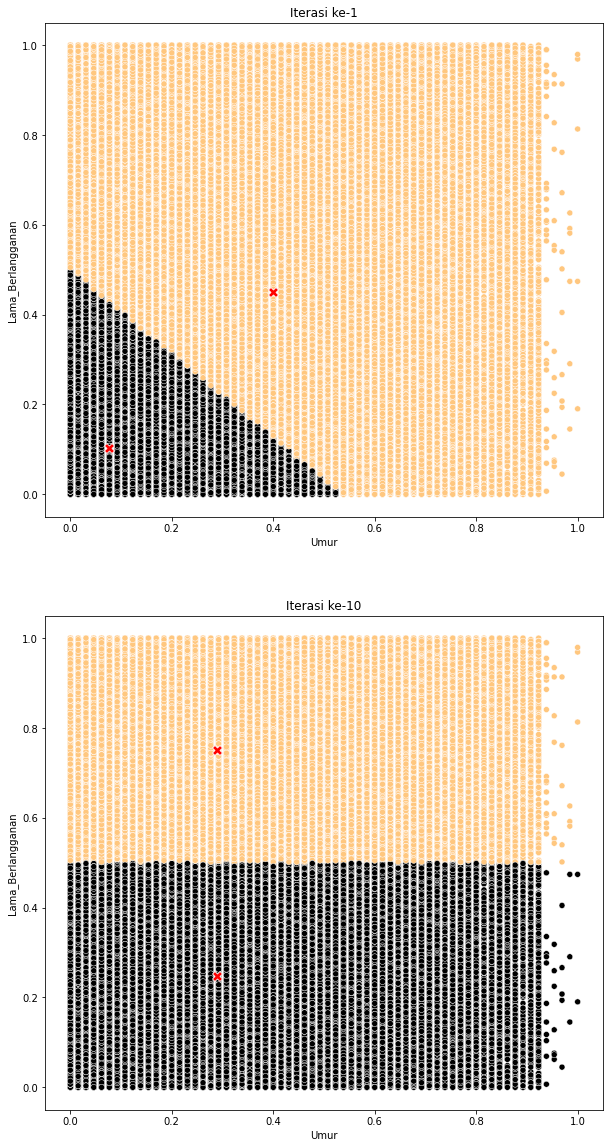

In [ ]:
centroAkhir = initCentroids(df, K)
indeks, centroAkhir = KMeans (df, centroAkhir)

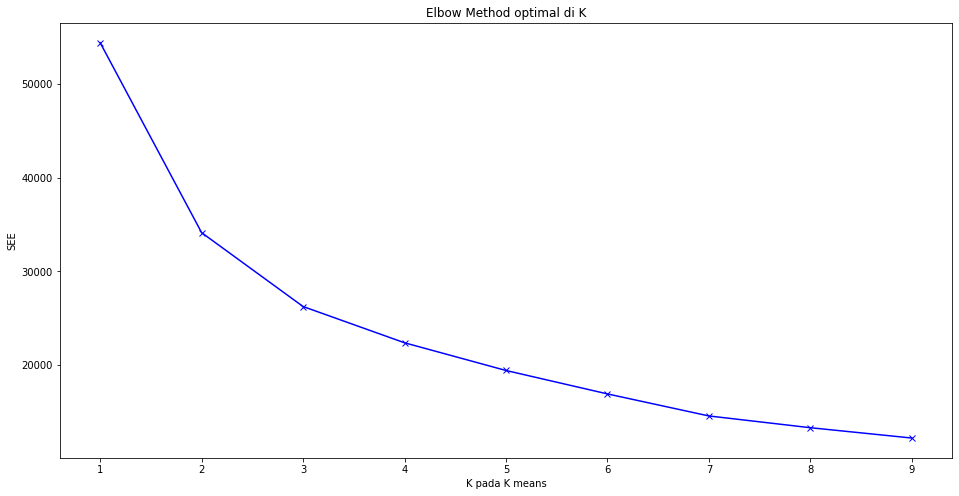

In [ ]:
# Evaluasi K - Means menggunakan Elbow Method
# Menggunakan Elbow Method untuk menentukan jumlah cluster yang efisien
# pada fitur yang dipilih
from sklearn.cluster import KMeans
see = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans (n_clusters=k)
    kmeanModel.fit(df)
    see.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, see, 'bx-')
plt.xlabel('K pada K means')
plt.ylabel('SEE')
plt.title('Elbow Method optimal di K')
plt.show()

Eksperimental

In [ ]:
# Copy Data Asli
df_exe = df1.copy()
df_exe.head()

,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.932099,0.301038
1,0.430769,0.750000,0.172840,0.512111
3,0.584615,0.923077,0.759259,0.183391
5,0.015385,0.673077,0.932099,0.557093
8,0.000000,0.153846,0.981481,0.072664


In [ ]:
df_exe = df_exe[['Kode_Daerah', 'Lama_Berlangganan']].copy()
df_exe

,Kode_Daerah,Lama_Berlangganan
0,0.634615,0.301038
1,0.750000,0.512111
3,0.923077,0.183391
5,0.673077,0.557093
8,0.153846,0.072664
...,...,...
285826,0.076923,0.716263
285827,0.884615,0.138408
285828,0.961538,0.747405
285829,0.134615,0.899654


In [ ]:
# Inisiasi Random Centroid Pertama
import random
def initCentroids(df, K):
  # Mengambil data df secara random sebanyak K
  randomNumber = random.sample(range(0, len(df)), K)
  initCentro = df.iloc[randomNumber, :]
  return initCentro
K = 4
# Mengambil Centroid secara random sebanyak K
centro = initCentroids(df, K)
centro

,Kode_Daerah,Lama_Berlangganan
247665,0.596154,0.332180
157270,0.788462,0.204152
43752,0.865385,0.117647
254197,0.769231,0.716263


In [ ]:
# Menghitung jarak anatar data menggunakan centroid
def euclidean(x, y):
  return np.sqrt(np.sum((x-y)**2, axis=1))

In [ ]:
def KMeans (df, initCentro, maxIteration = 10):
  fig, ax = plt.subplots(2, figsize=(10,20))

  # Menghitung setiap data yang ada di df
  # Menghitung jarak dengan currentCentro
  K = initCentro.shape[0]
  currentCentro = initCentro
  previousCentroid = currentCentro

  # Melakukan sebanyak max iteration
  for i in range(maxIteration):

    # Mencari Centroid Terdekat lalu 
    # Menyimpan pada indeks
    indeks = np.zeros((df.shape[0], K))

    #hitung jaraknya ke centroid yang ada
    for j in range(K): indeks[:,j] = euclidean(df, currentCentro.iloc[j])

    #mengambil jaraknya terkecil
    indeks = np.argmin(indeks, axis=1).reshape((df.shape[0],1))+1 
    if i==0 :
       sns.scatterplot (x=df.iloc[:,1], y=df.iloc[:,0], hue=indeks.ravel(), palette='copper', legend=False, ax=ax[0]).set_title(f'Iterasi ke-{i+1}')
       sns.scatterplot (x=currentCentro.iloc[:,1], y=currentCentro.iloc[:,0], marker='X', color='red', legend=False, s=100, ax=ax[0])
    elif i==(maxIteration-1):
       sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,0], hue=indeks.ravel(), palette='copper', legend=False, ax=ax[1]).set_title(f'Iterasi ke-{i+1}')
       sns.scatterplot(x=currentCentro.iloc[:,1], y=currentCentro.iloc[:,0], marker='X', color='red', legend=False, s=100, ax=ax[1])

    # Update Centroid dengan Mean per Cluster
    currentCentro = np.zeros((K, df.shape[1]))
    for m in range (K):
      # Menghitung mean tiap cluster
       currentCentro[m,:] = np.mean(df.iloc[(indeks==m+1).T[0], :], axis=0) 
    currentCentro = pd.DataFrame (currentCentro)
    currentCentro.columns = df.columns

  plt.show()
  return indeks, currentCentro

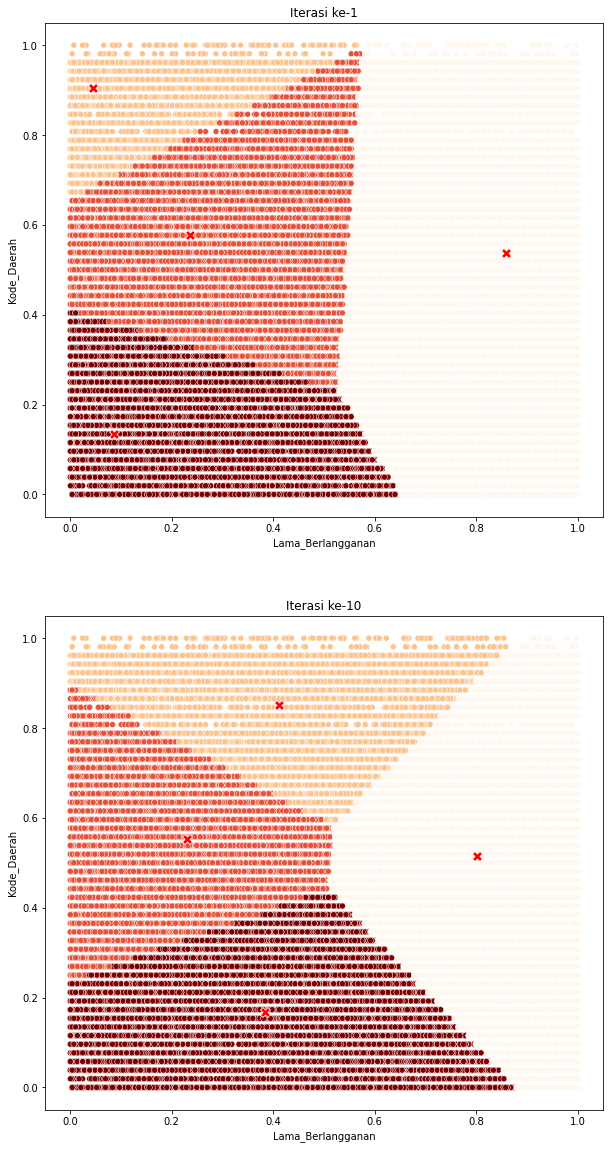

In [ ]:
centroAkhir = initCentroids(df_exe, K)
indeks, centroAkhir = KMeans (df_exe, centroAkhir)

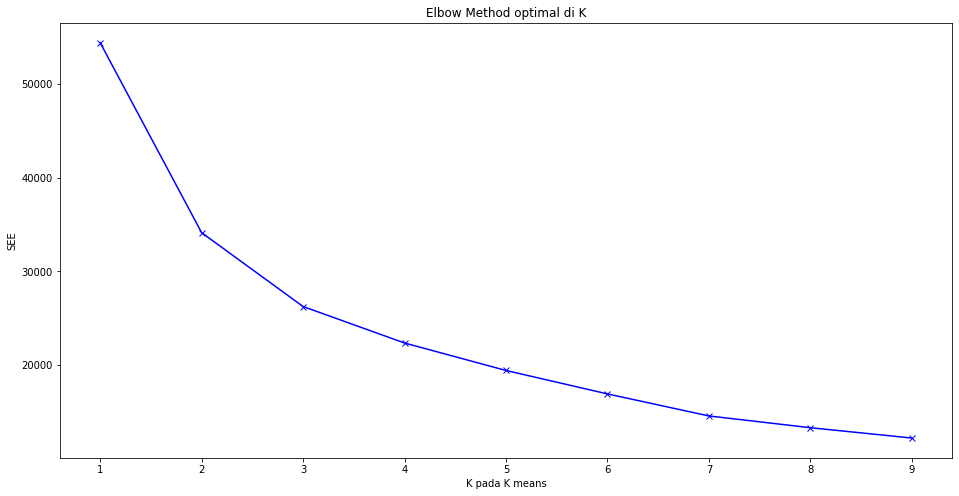

In [ ]:
# Evaluasi K - Means menggunakan Elbow Method
# Menggunakan Elbow Method untuk menentukan jumlah cluster yang efisien
# pada fitur yang dipilih
from sklearn.cluster import KMeans
see = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans (n_clusters=k)
    kmeanModel.fit(df)
    see.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, see, 'bx-')
plt.xlabel('K pada K means')
plt.ylabel('SEE')
plt.title('Elbow Method optimal di K')
plt.show()

Tidak dipakai

Text(0.5, 1.0, 'Multi-Collinearity of Something Attributes')

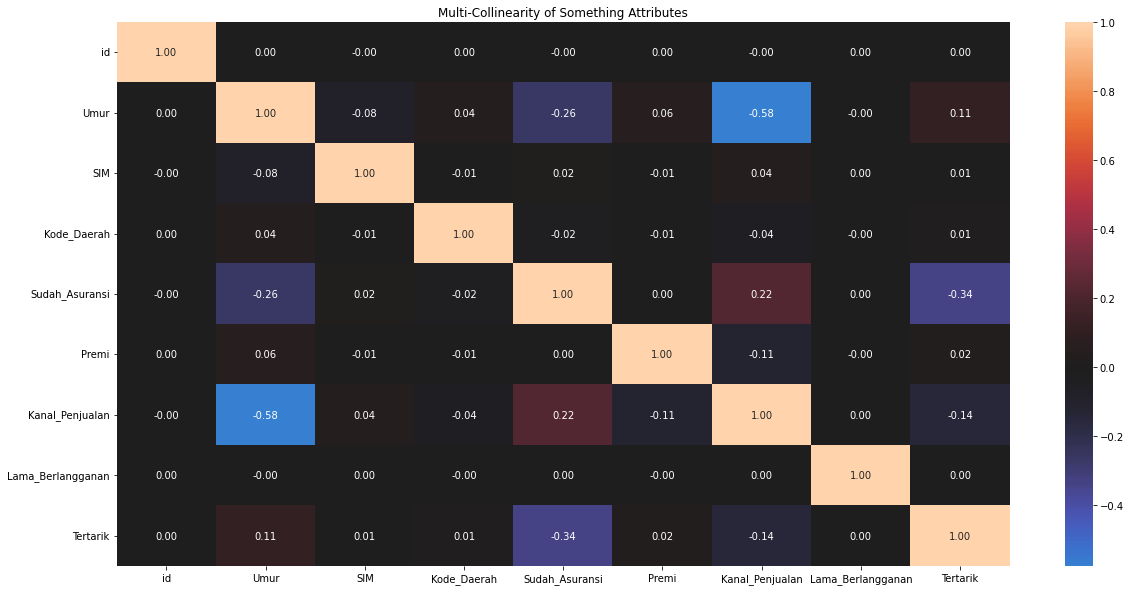

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(), center=0, annot=True, fmt=".2f")
ax.set_title('Multi-Collinearity of Something Attributes')

In [ ]:
# data kategorial bisa dibuah menjadi data yang meniliki nilai 1 dan 0

cleanup = { 'Jenis_Kelamin': {'Pria': 1, 'Wanita': 0}, 
            'Kendaraan_Rusak': {'Tidak': 0, 'Pernah':1},
            'Umur_Kendaraan': {'< 1 Tahun': 1, '1-2 Tahun': 2, '> 2 Tahun':3}}
 
df1 = df1.replace(cleanup)
df1

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,1.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,3.0,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,1.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,2.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,3.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0.0,23.0,1.0,4.0,1.0,1.0,0.0,25988.0,152.0,217.0,0
285827,285828,0.0,21.0,1.0,46.0,1.0,1.0,0.0,44686.0,152.0,50.0,0
285828,285829,0.0,23.0,1.0,50.0,1.0,1.0,0.0,49751.0,152.0,226.0,0
285829,285830,1.0,68.0,1.0,7.0,1.0,2.0,0.0,30503.0,124.0,270.0,0


In [ ]:
corr = df1.corr()

plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True)

In [ ]:
missing_datadf1 = df1.isnull()
missing_datadf1

In [ ]:
#info setiap variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221199 entries, 0 to 285830
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               221199 non-null  float64
 1   Kode_Daerah        221199 non-null  float64
 2   Premi              221199 non-null  float64
 3   Kanal_Penjualan    221199 non-null  float64
 4   Lama_Berlangganan  221199 non-null  float64
dtypes: float64(5)
memory usage: 10.1 MB


In [ ]:
# Menentukan Jarak Pada Data
def eucliden_distance(a, b):
       return(sum((a - b)**2))**0.5